In [4]:
import pandas as pd


df = pd.read_csv('/content/drive/MyDrive/MLops/project/داده بورس/booali_30min.csv', index_col=0, parse_dates=True)

In [5]:
df

,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume
time,,,,,,,,,,
2020-12-12 09:00:00,43500.0,43500.0,43500.0,43500.0,219264,43500.0,43500.0,43500.0,43500.0,219264
2020-12-12 09:30:00,43500.0,43500.0,43500.0,43500.0,126480,43500.0,43500.0,43500.0,43500.0,126480
2020-12-12 10:00:00,43500.0,43500.0,43500.0,43500.0,97054,43500.0,43500.0,43500.0,43500.0,97054
2020-12-12 10:30:00,43500.0,43500.0,43500.0,43500.0,79697,43500.0,43500.0,43500.0,43500.0,79697
2020-12-12 11:00:00,43500.0,43500.0,43500.0,43500.0,71417,43500.0,43500.0,43500.0,43500.0,71417
...,...,...,...,...,...,...,...,...,...,...
2023-04-19 10:00:00,52580.0,52620.0,52100.0,52120.0,800575,52620.0,52100.0,52580.0,52120.0,800575
2023-04-19 10:30:00,52110.0,52290.0,52090.0,52090.0,518185,52290.0,52090.0,52110.0,52090.0,518185
2023-04-19 11:00:00,52080.0,52090.0,51850.0,51860.0,800895,52090.0,51850.0,52080.0,51860.0,800895


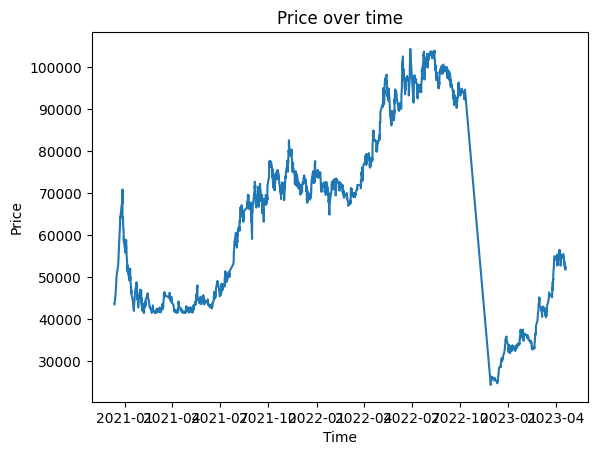

In [6]:
import matplotlib.pyplot as plt

# Assuming your dataframe is called "df"
plt.plot(df['Price_last'])

# Set the x-axis label
plt.xlabel('Time')

# Set the y-axis label
plt.ylabel('Price')

# Add a title to the plot
plt.title('Price over time')

# Display the plot
plt.show()


In [7]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 3.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:83: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


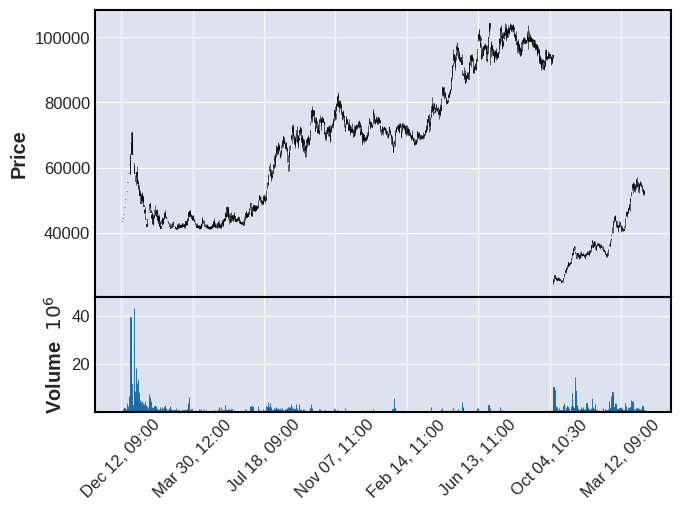

In [8]:
import mplfinance as mpf

# Assuming your dataframe is called "df"
mpf.plot(df, type='candle', volume=True)

In [9]:
df1 = pd.read_csv('/content/drive/MyDrive/MLops/project/داده بورس/booali_30min.csv')

In [10]:
import plotly.graph_objects as go
import pandas as pd


# Create figure
fig = go.Figure(data=[go.Candlestick(x=df1['time'],
                                      open=df1['open'],
                                      high=df1['high'],
                                      low=df1['low'],
                                      close=df1['close'])])

# Customize layout
fig.update_layout(title='Candlestick Chart',
                   yaxis_title='Price',
                   xaxis_rangeslider_visible=False)

# Show figure
fig.show()


In [11]:
l = []

for i in range(df1.shape[0]-1, 0, -1):
    if abs((df1.loc[i, 'open'] - df1.loc[i-1, 'close']) / df1.loc[i-1, 'close']) > 0.1:
        temp = df1.loc[i, 'open'] - df1.loc[i-1, 'close']
        print(i, '->', temp)
        l += [i]

3025 -> -69980.0
2580 -> -12060.0


In [12]:
for i in l:
    temp = df1.loc[i, 'open'] - df1.loc[i-1, 'close']
    df1.loc[:i-1, ['Price_first', 'Price_max', 'Price_min', 'Price_last', 'high', 'low', 'open', 'close']] += temp

In [13]:
import plotly.graph_objects as go
import pandas as pd


# Create figure
fig = go.Figure(data=[go.Candlestick(x=df1['time'],
                                      open=df1['open'],
                                      high=df1['high'],
                                      low=df1['low'],
                                      close=df1['close'])])

# Customize layout
fig.update_layout(title='Candlestick Chart',
                   yaxis_title='Price',
                   xaxis_rangeslider_visible=False)

# Show figure
fig.show()

In [14]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume
0,2020-12-12 09:00:00,-38540.0,-38540.0,-38540.0,-38540.0,219264,-38540.0,-38540.0,-38540.0,-38540.0,219264
1,2020-12-12 09:30:00,-38540.0,-38540.0,-38540.0,-38540.0,126480,-38540.0,-38540.0,-38540.0,-38540.0,126480
2,2020-12-12 10:00:00,-38540.0,-38540.0,-38540.0,-38540.0,97054,-38540.0,-38540.0,-38540.0,-38540.0,97054
3,2020-12-12 10:30:00,-38540.0,-38540.0,-38540.0,-38540.0,79697,-38540.0,-38540.0,-38540.0,-38540.0,79697
4,2020-12-12 11:00:00,-38540.0,-38540.0,-38540.0,-38540.0,71417,-38540.0,-38540.0,-38540.0,-38540.0,71417
...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,52580.0,52620.0,52100.0,52120.0,800575,52620.0,52100.0,52580.0,52120.0,800575
3662,2023-04-19 10:30:00,52110.0,52290.0,52090.0,52090.0,518185,52290.0,52090.0,52110.0,52090.0,518185
3663,2023-04-19 11:00:00,52080.0,52090.0,51850.0,51860.0,800895,52090.0,51850.0,52080.0,51860.0,800895
3664,2023-04-19 11:30:00,51860.0,51870.0,51790.0,51820.0,607565,51870.0,51790.0,51860.0,51820.0,607565


In [15]:
min_values = df1[['Price_first', 'Price_max', 'Price_min', 'Price_last', 'high', 'low', 'open', 'close']].min()

In [16]:
import numpy as np

min = np.min(list(min_values))

In [17]:
df1.loc[:, ['Price_first', 'Price_max', 'Price_min', 'Price_last', 'high', 'low', 'open', 'close']] += -min + 100

In [18]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,219264
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,126480
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,97054
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,79697
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,71417
...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,800575
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,518185
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,800895
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,607565


In [19]:
import plotly.graph_objects as go
import pandas as pd


# Create figure
fig = go.Figure(data=[go.Candlestick(x=df1['time'],
                                      open=df1['open'],
                                      high=df1['high'],
                                      low=df1['low'],
                                      close=df1['close'])])

# Customize layout
fig.update_layout(title='Candlestick Chart',
                   yaxis_title='Price',
                   xaxis_rangeslider_visible=False)

# Show figure
fig.show()

set percent

In [20]:
open = [0]
close = [0]
high = [0]
low = [0]

for i in range(1, df1.shape[0]):
    open += [(df1.loc[i, 'open'] - df1.loc[i-1, 'open']) / df1.loc[i-1, 'open']]
    close += [(df1.loc[i, 'close'] - df1.loc[i-1, 'close']) / df1.loc[i-1, 'close']]
    high += [(df1.loc[i, 'high'] - df1.loc[i-1, 'high']) / df1.loc[i-1, 'high']]
    low += [(df1.loc[i, 'low'] - df1.loc[i-1, 'low']) / df1.loc[i-1, 'low']]


In [21]:
df1['open%'] = open
df1['close%'] = close
df1['high%'] = high
df1['low%'] = low

In [22]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume,open%,close%,high%,low%
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,219264,0.000000,0.000000,0.000000,0.000000
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,126480,0.000000,0.000000,0.000000,0.000000
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,97054,0.000000,0.000000,0.000000,0.000000
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,79697,0.000000,0.000000,0.000000,0.000000
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,71417,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,800575,0.006333,-0.005118,-0.001171,0.002795
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,518185,-0.005013,-0.000322,-0.003518,-0.000107
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,800895,-0.000322,-0.002466,-0.002140,-0.002573
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,607565,-0.002359,-0.000430,-0.002359,-0.000645


Indicators

In [23]:
!pip install ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29103 sha256=265851dd8b6ef65883ff30b20c81fa8886ff0f887b2aa0f73637c47ee296a44b
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


# **RSI**

In [24]:
import pandas as pd
import ta


# Calculate RSI with ta library
df1['RSI'] = ta.momentum.RSIIndicator(df1['close'], window=14).rsi()

In [25]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume,open%,close%,high%,low%,RSI
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,219264,0.000000,0.000000,0.000000,0.000000,NaN
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,126480,0.000000,0.000000,0.000000,0.000000,NaN
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,97054,0.000000,0.000000,0.000000,0.000000,NaN
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,79697,0.000000,0.000000,0.000000,0.000000,NaN
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,71417,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,800575,0.006333,-0.005118,-0.001171,0.002795,36.551402
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,518185,-0.005013,-0.000322,-0.003518,-0.000107,36.295181
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,800895,-0.000322,-0.002466,-0.002140,-0.002573,34.309464
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,607565,-0.002359,-0.000430,-0.002359,-0.000645,33.961470


In [26]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


# create a subplot with 2 y-axes (candlestick chart and RSI)
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.02)

# add candlestick chart to first row
fig.add_trace(go.Candlestick(x=df1['time'],
                             open=df1['open'],
                             high=df1['high'],
                             low=df1['low'],
                             close=df1['close']),
              row=1, col=1)

# add RSI line chart to second row
fig.add_trace(go.Scatter(x=df1['time'], y=df1['RSI'], name='RSI'), row=2, col=1)

# update layout to show RSI chart below candlestick chart
fig.update_layout(yaxis=dict(domain=[0.6, 1]), yaxis2=dict(domain=[0, 0.4]))

# display the chart
fig.show()



# **StochasticOscillator**

In [27]:
import pandas as pd
from ta.momentum import StochasticOscillator


# Create stochastic oscillator with default parameters
stoch = StochasticOscillator(high=df1['high'], low=df1['low'], close=df1['close'])

# Add %K and %D lines to DataFrame
df1['%K'] = stoch.stoch()
df1['%D'] = stoch.stoch_signal()

df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume,open%,close%,high%,low%,RSI,%K,%D
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,219264,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,126480,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,97054,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,79697,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,71417,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,800575,0.006333,-0.005118,-0.001171,0.002795,36.551402,28.440367,30.138017
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,518185,-0.005013,-0.000322,-0.003518,-0.000107,36.295181,27.064220,33.779307
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,800895,-0.000322,-0.002466,-0.002140,-0.002573,34.309464,18.000000,24.501529
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,607565,-0.002359,-0.000430,-0.002359,-0.000645,33.961470,16.000000,20.354740


In [28]:
import plotly.graph_objects as go

# Replace these with your own data
k_values = df1['%K'].to_list()
d_values = df1['%D'].to_list()

# Calculate the oversold and overbought levels
oversold = [20] * len(k_values)
overbought = [80] * len(k_values)

# Create a figure with two traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1['time'], y=k_values, mode='lines', name='%K'))
fig.add_trace(go.Scatter(x=df1['time'], y=d_values, mode='lines', name='%D'))
fig.add_trace(go.Scatter(x=df1['time'], y=oversold, mode='lines', line=dict(color='red', dash='dash'), name='Oversold'))
fig.add_trace(go.Scatter(x=df1['time'], y=overbought, mode='lines', line=dict(color='green', dash='dash'), name='Overbought'))

# Update layout and axis properties
fig.update_layout(title='Stochastic Oscillator')
fig.update_xaxes(title='Period')
fig.update_yaxes(title='Value')

# Show the plot
fig.show()


# **Williams %R**

In [29]:
df1['Williams_%R'] = ta.momentum.WilliamsRIndicator(high=df1['high'], low=df1['low'], close=df1['close']).williams_r()

In [30]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume,open%,close%,high%,low%,RSI,%K,%D,Williams_%R
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,219264,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,126480,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,97054,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,79697,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,71417,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,800575,0.006333,-0.005118,-0.001171,0.002795,36.551402,28.440367,30.138017,-71.559633
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,518185,-0.005013,-0.000322,-0.003518,-0.000107,36.295181,27.064220,33.779307,-72.935780
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,800895,-0.000322,-0.002466,-0.002140,-0.002573,34.309464,18.000000,24.501529,-82.000000
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,607565,-0.002359,-0.000430,-0.002359,-0.000645,33.961470,16.000000,20.354740,-84.000000


In [31]:
import plotly.graph_objects as go

# Create a figure with two traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1['time'], y=df1['Williams_%R'], mode='lines'))

# Update layout and axis properties
fig.update_layout(title='Williams %R')
fig.update_xaxes(title='Period')
fig.update_yaxes(title='Value')

# Show the plot
fig.show()

# **accumulation distribution line**

In [32]:
import ta
import pandas as pd


# calculate the accumulation distribution line using the ta library
adl = ta.volume.AccDistIndexIndicator(
    high=df1['high'],
    low=df1['low'],
    close=df1['close'],
    volume=df1['volume'],
).acc_dist_index()

# add the ADL values to your DataFrame
df1['ADL'] = adl


In [33]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,volume,open%,close%,high%,low%,RSI,%K,%D,Williams_%R,ADL
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,219264,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,126480,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,97054,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,79697,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,71417,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,800575,0.006333,-0.005118,-0.001171,0.002795,36.551402,28.440367,30.138017,-71.559633,1.242967e+07
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,518185,-0.005013,-0.000322,-0.003518,-0.000107,36.295181,27.064220,33.779307,-72.935780,1.191148e+07
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,800895,-0.000322,-0.002466,-0.002140,-0.002573,34.309464,18.000000,24.501529,-82.000000,1.117733e+07
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,607565,-0.002359,-0.000430,-0.002359,-0.000645,33.961470,16.000000,20.354740,-84.000000,1.102544e+07


In [34]:
import plotly.graph_objects as go

# create a candlestick chart with plotly.graph_objects
fig = go.Figure(
    go.Candlestick(
        x=df1['time'],
        open=df1['open'],
        high=df1['high'],
        low=df1['low'],
        close=df1['close']
    )
)

# add the ADL line to the chart
fig.add_trace(
    go.Scatter(x=df1['time'], y=df1['ADL'], name='Accumulation Distribution Line')
)

# display the chart
fig.show()


# **Chaikin Money Flow**

In [35]:
import pandas as pd
import ta


# Calculate CMF using ta
df1['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(
    high=df1['high'], low=df1['low'], close=df1['close'], volume=df1['volume']).chaikin_money_flow()

In [36]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,...,open%,close%,high%,low%,RSI,%K,%D,Williams_%R,ADL,cmf
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,...,0.006333,-0.005118,-0.001171,0.002795,36.551402,28.440367,30.138017,-71.559633,1.242967e+07,-0.064132
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,...,-0.005013,-0.000322,-0.003518,-0.000107,36.295181,27.064220,33.779307,-72.935780,1.191148e+07,-0.065771
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,...,-0.000322,-0.002466,-0.002140,-0.002573,34.309464,18.000000,24.501529,-82.000000,1.117733e+07,-0.107171
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,...,-0.002359,-0.000430,-0.002359,-0.000645,33.961470,16.000000,20.354740,-84.000000,1.102544e+07,-0.101916


In [37]:
import plotly.graph_objects as go

# Create a figure with two traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1['time'], y=df1['cmf'], mode='lines'))

# Update layout and axis properties
fig.update_layout(title='CMF Indicator')
fig.update_xaxes(title='Period')
fig.update_yaxes(title='Value')

# Show the plot
fig.show()

# **On Balance Volume**

In [38]:
# Calculate the OBV values using the ta library
obv = ta.volume.OnBalanceVolumeIndicator(df1['close'], df1['volume']).on_balance_volume()

# Add the OBV values to your DataFrame as a new column
df1['obv'] = obv


In [39]:
import plotly.graph_objects as go

# Create a figure with two traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1['time'], y=df1['obv'], mode='lines'))

# Update layout and axis properties
fig.update_layout(title='CMF Indicator')
fig.update_xaxes(title='Period')
fig.update_yaxes(title='Value')

# Show the plot
fig.show()

# **moving average convergence divergence (MACD)**

In [40]:
df1['macd'] = ta.trend.MACD(df1['close']).macd()

In [41]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,...,high%,low%,RSI,%K,%D,Williams_%R,ADL,cmf,obv,macd
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,219264,NaN
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,345744,NaN
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,442798,NaN
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,522495,NaN
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,593912,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,...,-0.001171,0.002795,36.551402,28.440367,30.138017,-71.559633,1.242967e+07,-0.064132,434117127,-550.272825
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,...,-0.003518,-0.000107,36.295181,27.064220,33.779307,-72.935780,1.191148e+07,-0.065771,433598942,-556.978986
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,...,-0.002140,-0.002573,34.309464,18.000000,24.501529,-82.000000,1.117733e+07,-0.107171,432798047,-574.233340
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,...,-0.002359,-0.000645,33.961470,16.000000,20.354740,-84.000000,1.102544e+07,-0.101916,432190482,-584.398622


In [42]:
import plotly.graph_objects as go

# Create a figure with two traces
fig = go.Figure()

fig.add_trace(go.Scatter(x=df1['time'], y=df1['macd'], mode='lines'))

# Update layout and axis properties
fig.update_layout(title='MACD Indicator')
fig.update_xaxes(title='Period')
fig.update_yaxes(title='Value')

# Show the plot
fig.show()

# **Ichimoku Cloud**

In [43]:
indicator_cloud = ta.trend.IchimokuIndicator(high=df1["high"], low=df1["low"])
df1['ichimoku_base_line'] = indicator_cloud.ichimoku_base_line()
df1['ichimoku_conversion_line'] = indicator_cloud.ichimoku_conversion_line()
df1['ichimoku_a'] = indicator_cloud.ichimoku_a()
df1['ichimoku_b'] = indicator_cloud.ichimoku_b()

In [44]:
df1

,time,Price_first,Price_max,Price_min,Price_last,Volume_sum,high,low,open,close,...,%D,Williams_%R,ADL,cmf,obv,macd,ichimoku_base_line,ichimoku_conversion_line,ichimoku_a,ichimoku_b
0,2020-12-12 09:00:00,2640.0,2640.0,2640.0,2640.0,219264,2640.0,2640.0,2640.0,2640.0,...,NaN,NaN,0.000000e+00,NaN,219264,NaN,NaN,NaN,NaN,2640.0
1,2020-12-12 09:30:00,2640.0,2640.0,2640.0,2640.0,126480,2640.0,2640.0,2640.0,2640.0,...,NaN,NaN,0.000000e+00,NaN,345744,NaN,NaN,NaN,NaN,2640.0
2,2020-12-12 10:00:00,2640.0,2640.0,2640.0,2640.0,97054,2640.0,2640.0,2640.0,2640.0,...,NaN,NaN,0.000000e+00,NaN,442798,NaN,NaN,NaN,NaN,2640.0
3,2020-12-12 10:30:00,2640.0,2640.0,2640.0,2640.0,79697,2640.0,2640.0,2640.0,2640.0,...,NaN,NaN,0.000000e+00,NaN,522495,NaN,NaN,NaN,NaN,2640.0
4,2020-12-12 11:00:00,2640.0,2640.0,2640.0,2640.0,71417,2640.0,2640.0,2640.0,2640.0,...,NaN,NaN,0.000000e+00,NaN,593912,NaN,NaN,NaN,NaN,2640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3661,2023-04-19 10:00:00,93760.0,93800.0,93280.0,93300.0,800575,93800.0,93280.0,93760.0,93300.0,...,30.138017,-71.559633,1.242967e+07,-0.064132,434117127,-550.272825,94730.0,93675.0,94202.5,94930.0
3662,2023-04-19 10:30:00,93290.0,93470.0,93270.0,93270.0,518185,93470.0,93270.0,93290.0,93270.0,...,33.779307,-72.935780,1.191148e+07,-0.065771,433598942,-556.978986,94730.0,93645.0,94187.5,94930.0
3663,2023-04-19 11:00:00,93260.0,93270.0,93030.0,93040.0,800895,93270.0,93030.0,93260.0,93040.0,...,24.501529,-82.000000,1.117733e+07,-0.107171,432798047,-574.233340,94375.0,93645.0,94010.0,94930.0
3664,2023-04-19 11:30:00,93040.0,93050.0,92970.0,93000.0,607565,93050.0,92970.0,93040.0,93000.0,...,20.354740,-84.000000,1.102544e+07,-0.101916,432190482,-584.398622,94350.0,93440.0,93895.0,94930.0


In [45]:
# Create a candlestick chart using Plotly
fig = go.Figure(data=[go.Candlestick(x=df1['time'],
                open=df1['open'], high=df1['high'],
                low=df1['low'], close=df1['close'])])

# Add the Ichimoku Cloud to the chart
fig.add_trace(go.Scatter(x=df1['time'], y=df1['ichimoku_a'], name='Ichimoku A', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=df1['time'], y=df1['ichimoku_b'], name='Ichimoku B', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df1['time'], y=df1['ichimoku_conversion_line'], name='Conversion Line', line=dict(color='red')))
fig.add_trace(go.Scatter(x=df1['time'], y=df1['ichimoku_base_line'], name='Base Line', line=dict(color='purple')))
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

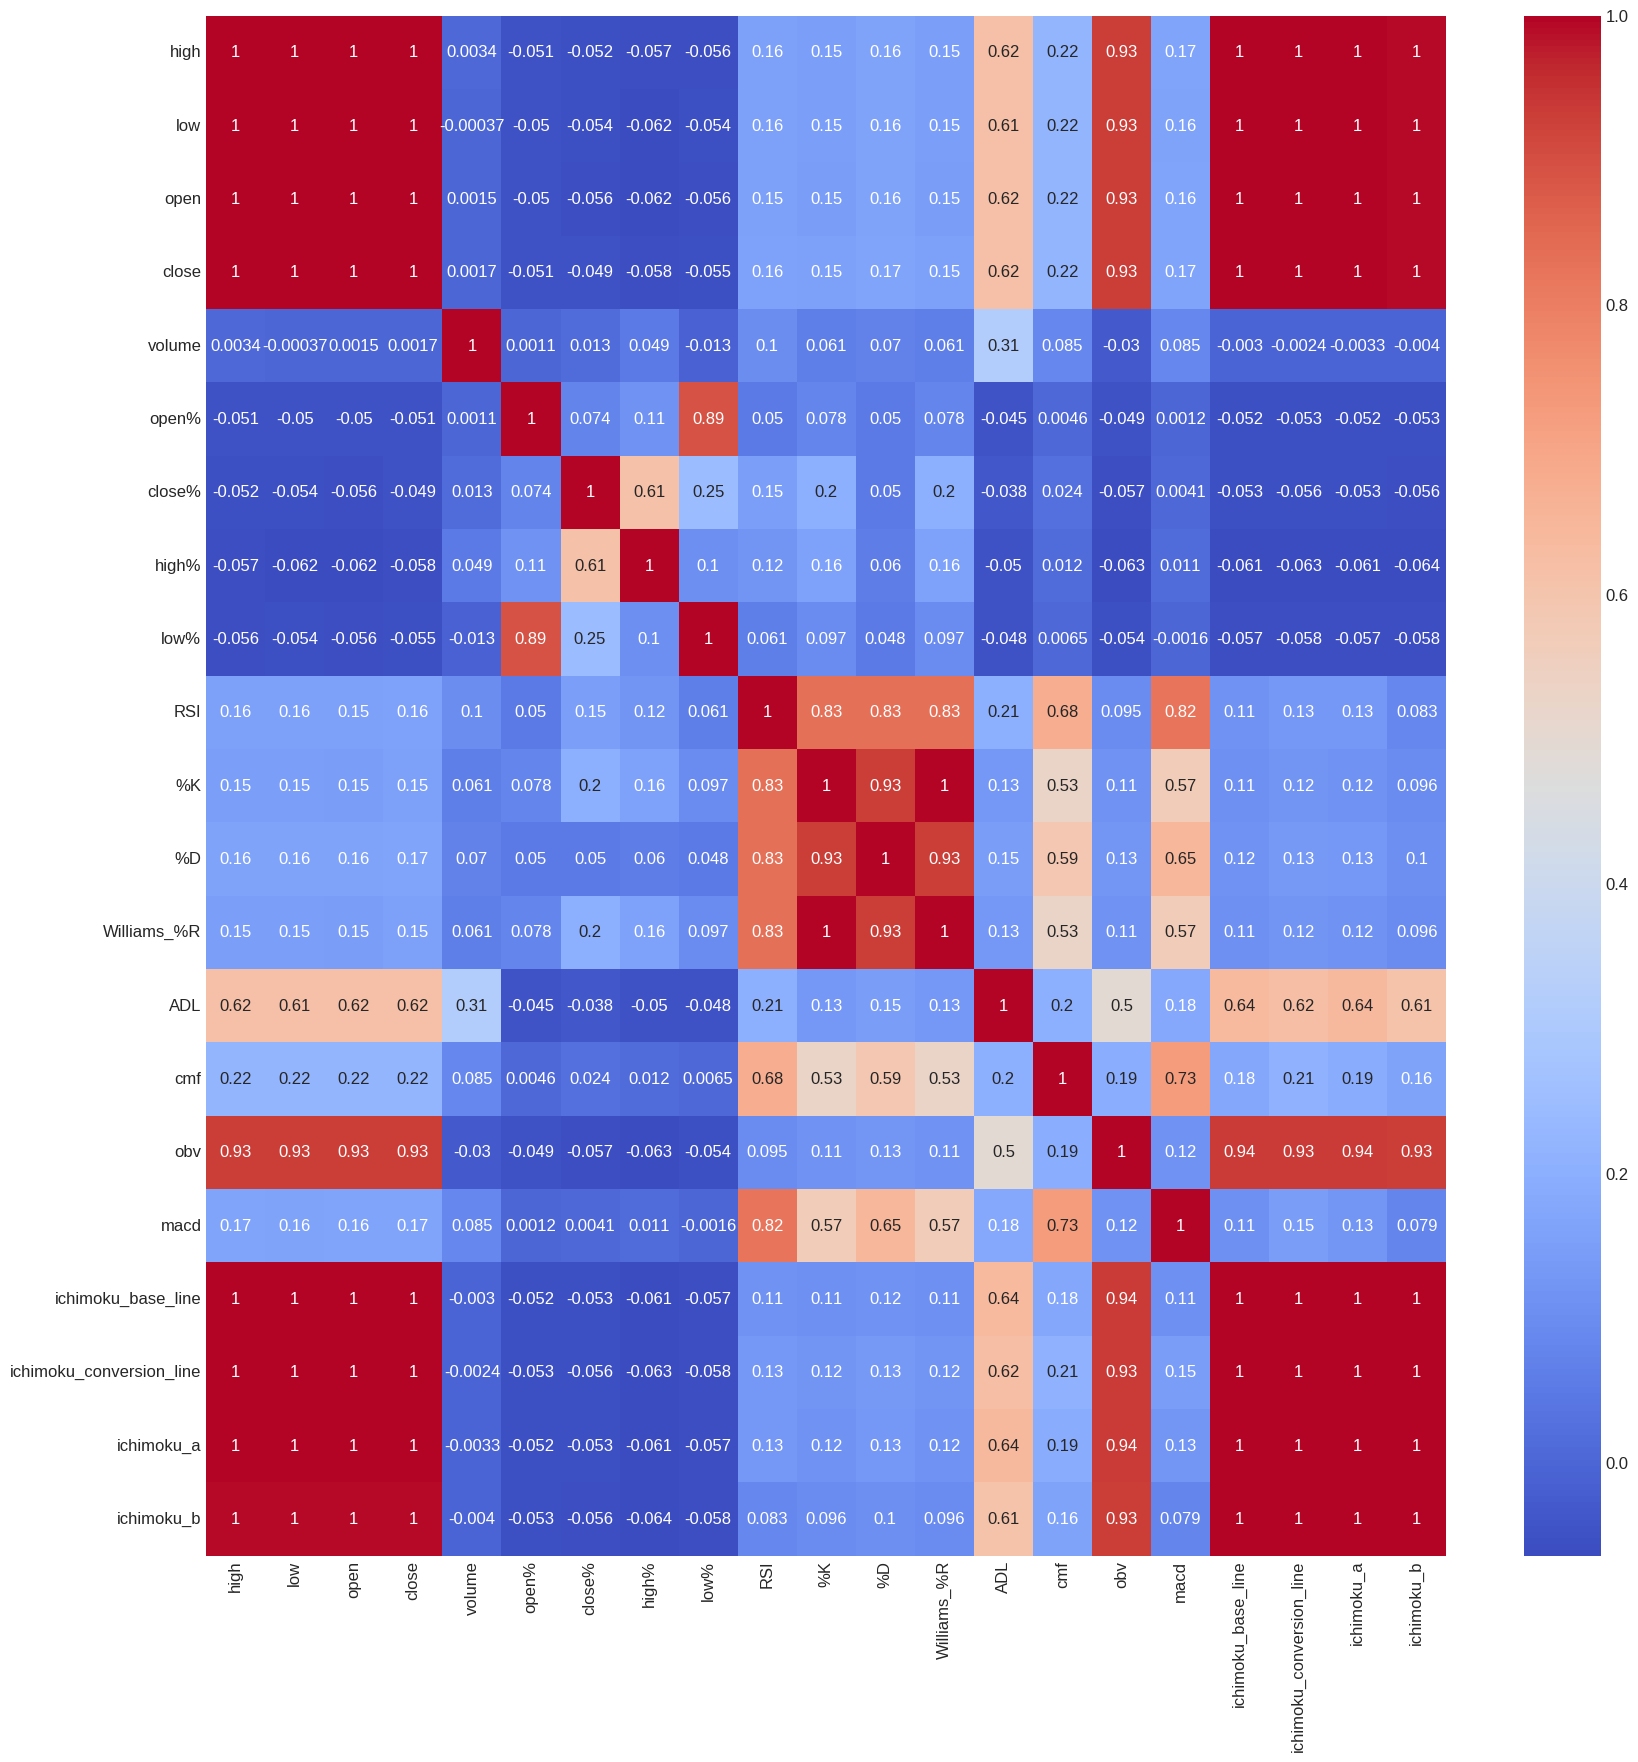

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df1.iloc[:, 6:].corr()

plt.subplots(figsize=(20, 20))
# Create a heatmap plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

**Apply to all**

In [ ]:
import os

# List all CSV files in the current directory
files = [f.split('.')[0] for f in os.listdir('/content/drive/MyDrive/MLops/project/داده بورس/') if f.endswith('.csv')]

# Print the list of files
print(files)
print(len(files))

['vatoosa_5min', 'vatoosa_30min', 'vatoosa_1H', 'vatoosa_1D', 'vasapa_5min', 'vasapa_30min', 'vasapa_1H', 'vasapa_1D', 'tapico_5min', 'tapico_30min', 'tapico_1H', 'tapico_1D', 'vasepehr_5min', 'vasepehr_30min', 'vasepehr_1H', 'vasepehr_1D', 'vatejarat_5min', 'vatejarat_30min', 'vatejarat_1H', 'vatejarat_1D', 'fars_5min', 'fars_30min', 'fars_1H', 'fars_1D', 'shebandar_5min', 'shebandar_30min', 'shebandar_1H', 'shebandar_1D', 'shavan_5min', 'shavan_30min', 'shavan_1H', 'shavan_1D', 'shebahran_5min', 'shebahran_30min', 'shebahran_1H', 'shebahran_1D', 'booali_5min', 'booali_30min', 'booali_1H', 'booali_1D', 'parsan_5min', 'parsan_30min', 'parsan_1H', 'parsan_1D', 'sheranol_5min', 'sheranol_30min', 'sheranol_1H', 'sheranol_1D', 'vabemellat_5min', 'vabemellat_30min', 'vabemellat_1H', 'vabemellat_1D', 'vabesader_5min', 'vabesader_30min', 'vabesader_1H', 'vabesader_1D', 'vakharazm_5min', 'vakharazm_30min', 'vakharazm_1H', 'vakharazm_1D', 'noori_5min', 'noori_30min', 'noori_1H', 'noori_1D', 'da

In [ ]:
counter = 0

for csv in files:
    counter += 1
    print(counter)
    print(csv)

    path = '/content/drive/MyDrive/MLops/project/داده بورس/' + csv + '.csv'
    df1 = pd.read_csv(path)

    l = []
    for i in range(df1.shape[0]-1, 0, -1):
        if abs((df1.loc[i, 'open'] - df1.loc[i-1, 'close']) / df1.loc[i-1, 'close']) > 0.1:
            temp = df1.loc[i, 'open'] - df1.loc[i-1, 'close']
            print(i, '->', temp)
            l += [i]
    
    for i in l:
        temp = df1.loc[i, 'open'] - df1.loc[i-1, 'close']
        df1.loc[:i-1, ['Price_first', 'Price_max', 'Price_min', 'Price_last', 'high', 'low', 'open', 'close']] += temp

    print("    STEP 1")
    min_values = df1[['Price_first', 'Price_max', 'Price_min', 'Price_last', 'high', 'low', 'open', 'close']].min()
    min = np.min(list(min_values))
    df1.loc[:, ['Price_first', 'Price_max', 'Price_min', 'Price_last', 'high', 'low', 'open', 'close']] += -min + 100

    open = [0]
    close = [0]
    high = [0]
    low = [0]

    for i in range(1, df1.shape[0]):
        open += [(df1.loc[i, 'open'] - df1.loc[i-1, 'open']) / df1.loc[i-1, 'open']]
        close += [(df1.loc[i, 'close'] - df1.loc[i-1, 'close']) / df1.loc[i-1, 'close']]
        high += [(df1.loc[i, 'high'] - df1.loc[i-1, 'high']) / df1.loc[i-1, 'high']]
        low += [(df1.loc[i, 'low'] - df1.loc[i-1, 'low']) / df1.loc[i-1, 'low']]

    df1['open%'] = open
    df1['close%'] = close
    df1['high%'] = high
    df1['low%'] = low

    print("    STEP 2")


    df1['RSI'] = ta.momentum.RSIIndicator(df1['close'], window=14).rsi()
    # Create stochastic oscillator with default parameters
    stoch = StochasticOscillator(high=df1['high'], low=df1['low'], close=df1['close'])

    # Add %K and %D lines to DataFrame
    df1['%K'] = stoch.stoch()
    df1['%D'] = stoch.stoch_signal()

    df1['Williams_%R'] = ta.momentum.WilliamsRIndicator(high=df1['high'], low=df1['low'], close=df1['close']).williams_r()
    # calculate the accumulation distribution line using the ta library
    adl = ta.volume.AccDistIndexIndicator(
        high=df1['high'],
        low=df1['low'],
        close=df1['close'],
        volume=df1['volume'],
    ).acc_dist_index()

    print("    STEP 3")

    # add the ADL values to your DataFrame
    df1['ADL'] = adl

    # Calculate CMF using ta
    df1['cmf'] = ta.volume.ChaikinMoneyFlowIndicator(
        high=df1['high'], low=df1['low'], close=df1['close'], volume=df1['volume']).chaikin_money_flow()

    # Calculate the OBV values using the ta library
    obv = ta.volume.OnBalanceVolumeIndicator(df1['close'], df1['volume']).on_balance_volume()

    # Add the OBV values to your DataFrame as a new column
    df1['obv'] = obv

    df1['macd'] = ta.trend.MACD(df1['close']).macd()

    indicator_cloud = ta.trend.IchimokuIndicator(high=df1["high"], low=df1["low"])
    df1['ichimoku_base_line'] = indicator_cloud.ichimoku_base_line()
    df1['ichimoku_conversion_line'] = indicator_cloud.ichimoku_conversion_line()
    df1['ichimoku_a'] = indicator_cloud.ichimoku_a()
    df1['ichimoku_b'] = indicator_cloud.ichimoku_b()


    df1.dropna(inplace=True)
    df1.to_csv('V2_' + csv + '.csv', index=False)

1
vatoosa_5min
12351 -> -3990.0
1065 -> -810.0
    STEP 1
    STEP 2
    STEP 3
2
vatoosa_30min
2364 -> -3990.0
253 -> -810.0
    STEP 1
    STEP 2
    STEP 3
3
vatoosa_1H
1353 -> -3990.0
145 -> -810.0
    STEP 1
    STEP 2
    STEP 3
4
vatoosa_1D
341 -> -3990.0
37 -> -810.0
    STEP 1
    STEP 2
    STEP 3
5
vasapa_5min
29202 -> -957.0
14844 -> 2030.0
14400 -> 1420.0
13297 -> 757.0
13230 -> 623.0
    STEP 1
    STEP 2
    STEP 3
6
vasapa_30min
5095 -> -957.0
2556 -> 2030.0
2478 -> 1420.0
2284 -> 757.0
2272 -> 623.0
    STEP 1
    STEP 2
    STEP 3
7
vasapa_1H
2888 -> -957.0
1442 -> 2030.0
1398 -> 1420.0
1286 -> 757.0
1279 -> 623.0
    STEP 1
    STEP 2
    STEP 3
8
vasapa_1D
724 -> -957.0
362 -> 2030.0
350 -> 1420.0
321 -> 757.0
319 -> 623.0
    STEP 1
    STEP 2
    STEP 3
9
tapico_5min
34403 -> -4250.0
24535 -> -1810.0
17106 -> -1580.0
15838 -> 1880.0
13826 -> 1078.0
13120 -> 1150.0
12492 -> 469.0
6926 -> -322.0
    STEP 1
    STEP 2
    STEP 3
10
tapico_30min
5909 -> -4250.0
4233 -

In [ ]:
!mkdir /content/data_v2

In [ ]:
!cp /content/V2* /content/data_v2/

In [ ]:
!zip -r data_v2.zip data_v2

  adding: data_v2/ (stored 0%)
  adding: data_v2/V2_vatejarat_1D.csv (deflated 61%)
  adding: data_v2/V2_vasapa_5min.csv (deflated 70%)
  adding: data_v2/V2_noori_1H.csv (deflated 63%)
  adding: data_v2/V2_vabemellat_1H.csv (deflated 64%)
  adding: data_v2/V2_vatoosa_5min.csv (deflated 71%)
  adding: data_v2/V2_vabemellat_5min.csv (deflated 68%)
  adding: data_v2/V2_booali_5min.csv (deflated 68%)
  adding: data_v2/V2_shegooya_30min.csv (deflated 67%)
  adding: data_v2/V2_vakharazm_30min.csv (deflated 66%)
  adding: data_v2/V2_shegooya_1D.csv (deflated 60%)
  adding: data_v2/V2_dey_1H.csv (deflated 66%)
  adding: data_v2/V2_petrol_1D.csv (deflated 60%)
  adding: data_v2/V2_shapdis_30min.csv (deflated 64%)
  adding: data_v2/V2_vasepehr_5min.csv (deflated 73%)
  adding: data_v2/V2_booali_1D.csv (deflated 60%)
  adding: data_v2/V2_vakharazm_5min.csv (deflated 68%)
  adding: data_v2/V2_vabesader_30min.csv (deflated 67%)
  adding: data_v2/V2_shegooya_1H.csv (deflated 65%)
  adding: data_v2/V

In [ ]:
!cp data_v2.zip /content/drive/MyDrive/MLops/project